In [1]:
# Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2023-07-09 21:19:50.592159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 21:19:50.717072: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 21:19:50.720048: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 21:19:52.100229: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
# Encoding the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Vectorized training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
# Vectorize the labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
# Building the network and defining model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.7352 - accuracy: 0.4321 - val_loss: 1.8316 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.5382 - accuracy: 0.6819 - val_loss: 1.3628 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.1774 - accuracy: 0.7487 - val_loss: 1.2046 - val_accuracy: 0.7230
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.9644 - accuracy: 0.7910 - val_loss: 1.0981 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8012 - accuracy: 0.8301 - val_loss: 1.0029 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6680 - accuracy: 0.8563 - val_loss: 0.9712 - val_accuracy: 0.7770
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5614 - accuracy: 0.8756 - val_loss: 0.9204 - val_accuracy: 0.7970
Epoch 8/20
16

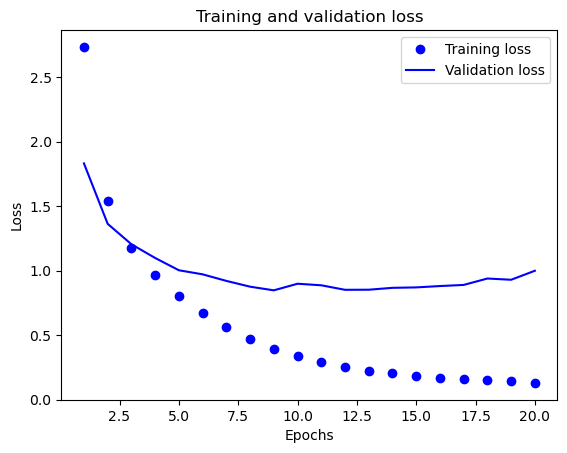

In [7]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

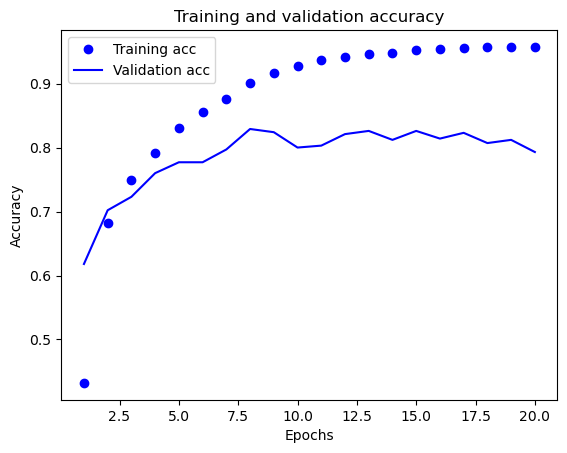

In [9]:
plt.clf()

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Check the key names and update if necessary
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 39ms/step - loss: 2.7425 - accuracy: 0.4989 - val_loss: 1.7859 - val_accuracy: 0.6200
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.4941 - accuracy: 0.6840 - val_loss: 1.3280 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.1218 - accuracy: 0.7617 - val_loss: 1.1509 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.9114 - accuracy: 0.8043 - val_loss: 1.0537 - val_accuracy: 0.7660
Epoch 5/9
16/16 [==============================] - 0s 21ms/step - loss: 0.7609 - accuracy: 0.8321 - val_loss: 0.9777 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 0s 20ms/step - loss: 0.6295 - accuracy: 0.8666 - val_loss: 0.9292 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5278 - accuracy: 0.8920 - val_loss: 0.9174 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

In [11]:
results

[0.9844491481781006, 0.7702582478523254]